<a href="https://colab.research.google.com/github/yamachanyama/Python_AI_ML/blob/main/%E3%81%99%E3%81%90%E3%81%AB%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81%E6%A5%AD%E5%8B%99%E3%81%A7%E5%AE%9F%E8%B7%B5%E3%81%A7%E3%81%8D%E3%82%8B%EF%BC%81Python%E3%81%AB%E3%82%88%E3%82%8BAI%E3%83%BB%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%97%E3%83%AA%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8A%E6%96%B9/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# アヤメデータの読み込み --- (*1)
iris_data = pd.read_csv("https://raw.githubusercontent.com/yamachanyama/Python_AI_ML/main/%E3%81%99%E3%81%90%E3%81%AB%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81%E6%A5%AD%E5%8B%99%E3%81%A7%E5%AE%9F%E8%B7%B5%E3%81%A7%E3%81%8D%E3%82%8B%EF%BC%81Python%E3%81%AB%E3%82%88%E3%82%8BAI%E3%83%BB%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%97%E3%83%AA%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8A%E6%96%B9/iris.csv", encoding="utf-8")

# アヤメデータをラベルと入力データに分離する
y_labels = iris_data.loc[:,"Name"]
x_data = iris_data.loc[:,
    ["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

# ラベルデータをone-hotベクトルに直す
labels = {
    'Iris-setosa': [1, 0, 0], 
    'Iris-versicolor': [0, 1, 0], 
    'Iris-virginica': [0, 0, 1]
}
y_nums = np.array(list(map(lambda v : labels[v] , y_labels))) #https://www.sejuku.net/blog/21812
x_data = np.array(x_data)


In [3]:
# 学習用とテスト用に分割する --- (*2)
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_nums, train_size=0.8)


In [4]:
# モデル構造を定義 --- (*3)

import tensorflow as tf
import tensorflow.keras as keras
Dense = keras.layers.Dense


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
plt.figure(figsize=(10,6),dpi=200)
plt.rcParams['figure.figsize'] = (10 ,6)

def fit(epochs):
    # モデルの構造を定義
    model = keras.models.Sequential()
    model.add(Dense(10, activation='relu', input_shape=(4,)))
    model.add(Dense(3, activation='softmax'))
    # モデルを構築
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
    # 学習を実行
    result = model.fit(x_train, y_train,
        batch_size=20,
        epochs=epochs)
    # モデルを評価
    score = model.evaluate(x_test, y_test, verbose=1)
    print('正解率=', score[1], 'loss=', score[0])
    # グラフを描画
    plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
    plt.plot(range(1, epochs+1), result.history['loss'], label="loss")
    plt.xlabel('Epochs=' + str(epochs))
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


<Figure size 2000x1200 with 0 Axes>

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 1.7132 - accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 1.6111 - accuracy: 0.3333
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 1.5077 - accuracy: 0.3333
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 1.4247 - accuracy: 0.3167
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 1.3554 - accuracy: 0.2833
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 1.2971 - accuracy: 0.2667
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 1.2431 - accuracy: 0.2583
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 1.2066 - accuracy: 0.2667
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 1.1729 - accuracy: 0.3167
Epoch 10/10
1/1 [==============================] - 0s 158ms/step - loss: 1.1342 - accuracy: 0.3333
正解率= 0.3333333432674408 loss= 1.13418

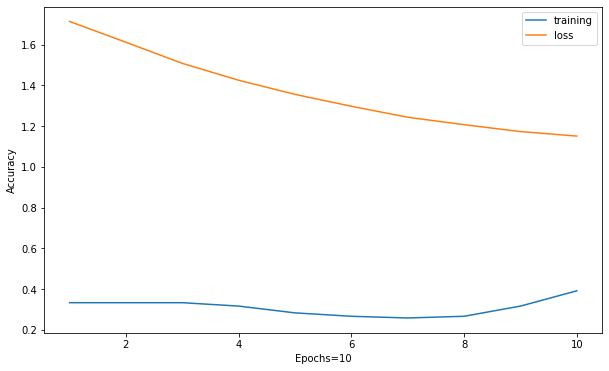

In [6]:
fit(10)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 1.6253 - accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.5218 - accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 1.4246 - accuracy: 0.3333
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 1.3463 - accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 1.2832 - accuracy: 0.3250
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.2338 - accuracy: 0.3167
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 1.1954 - accuracy: 0.2750
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 1.1686 - accuracy: 0.2083
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1490 - accuracy: 0.1417
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1317 - accuracy: 0.0667
Epoch 11/100
6/6 [===========

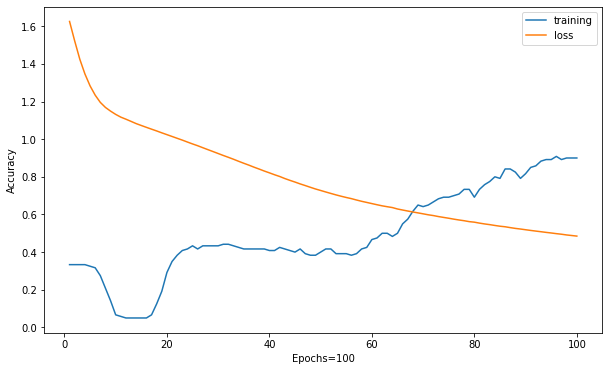

In [7]:
fit(100)

Epoch 1/300
6/6 [==============================] - 0s 2ms/step - loss: 2.0517 - accuracy: 0.3417
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 1.8992 - accuracy: 0.3417
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 1.7603 - accuracy: 0.3417
Epoch 4/300
6/6 [==============================] - 0s 2ms/step - loss: 1.6357 - accuracy: 0.3417
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5329 - accuracy: 0.3417
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 1.4346 - accuracy: 0.3667
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 1.3498 - accuracy: 0.5250
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.2752 - accuracy: 0.6167
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 1.2115 - accuracy: 0.6500
Epoch 10/300
6/6 [==============================] - 0s 2ms/step - loss: 1.1682 - accuracy: 0.6667
Epoch 11/300
6/6 [===========

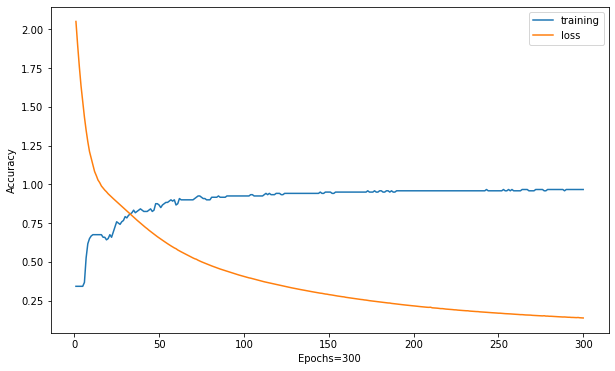

In [8]:
fit(300)